In [1]:
import logging

def configure_logger():
    root_logger = logging.getLogger()
    root_logger.setLevel(logging.INFO)
    handler = logging.StreamHandler()
    formatter = logging.Formatter(
        fmt='%(asctime)s - %(name)s - %(levelname)s - %(message)s')
    handler.setFormatter(formatter)
    root_logger.addHandler(handler)

In [2]:
import os 

import numpy as np
import pandas as pd

In [3]:
#!gsutil -m rsync -r gs://elvos/processed/luke /home/amy/data/amy1

In [4]:
#!ls /home/amy/data/amy1/from_numpy

In [5]:
!ls /home/amy/data/amy1/from_luke_training

04IOS24JP70LHBGB_mip.npy   FYSSUUSC5XYNLUQW_mip.npy  PKSQ49QA03C0GTJ8_mip.npy
04IOS24JP70LHBGB_mip0.npy  FYXMPCGHTGJXJBSD_mip.npy  PMLTPI058LNPOB6K_mip.npy
04IOS24JP70LHBGB_mip1.npy  G06KIRHKXWJZV4JL_mip.npy  PMMV7MLZUWJTIMLR_mip.npy
04IOS24JP70LHBGB_mip2.npy  GCBJDIT55TRGHZIR_mip.npy  PMUAC5NYSRLNM8NZ_mip.npy
0E1AN2T001WORM02_mip.npy   GDYRQZ2185AOXLHC_mip.npy  PMUXVQHYYYBOK4RL_mip.npy
0E1AN2T001WORM02_mip0.npy  GET5PY3CH6RJV3UW_mip.npy  PNPGGIFOXWJJQ22P_mip.npy
0E1AN2T001WORM02_mip1.npy  GG1EJGK0NHRCBIBA_mip.npy  POYYSD3RSJFBKSLQ_mip.npy
0E1AN2T001WORM02_mip2.npy  GHD3U9CYRYQ4A0A0_mip.npy  PQ918CDGQIFXXXN1_mip.npy
0KSBX96F8BU1FCFQ_mip.npy   GHNKISIFB2PFOZ8O_mip.npy  PQLRGWB8W5XDIP1B_mip.npy
0KSBX96F8BU1FCFQ_mip0.npy  GHVG2CNNRZ65UBEU_mip.npy  PWECQP8X5J7H4F2Y_mip.npy
0KSBX96F8BU1FCFQ_mip1.npy  GIPUIOSNW2C34HIS_mip.npy  PYRDN2YA3MWCWKCC_mip.npy
0KSBX96F8BU1FCFQ_mip2.npy  GJ35FZQ5DSP09A4L_mip.npy  Q2ZSL21Z90QTPXY5_mip.npy
0MG5EK1O64CPS887_mip.npy   GJ5CHFO5E33QWWNW_mip.npy  Q7TZ7D9MDFN

In [6]:
LENGTH, WIDTH, HEIGHT = (120, 120, 64)

VALID_TRAINING_INDICES = []
VALID_VALIDATION_INDICES = []

def load_training_data() -> np.array:
    """Returns 4D matri x of training data
    Data is in the form (n_samples, 1, w, h). 
    Samples are sorted by patient ID"""
    arrays = []
    training_filenames = sorted(os.listdir(
        '/home/amy/data/amy1/training/'))
    print(len(training_filenames))
    for i, filename in enumerate(training_filenames):
        arr = np.load('/home/amy/data/amy1/training/' + filename)
        #print(arr.shape)
        if arr.shape == (LENGTH, WIDTH, HEIGHT):
            arrays.append(arr)
            VALID_TRAINING_INDICES.append(i)
        else:
            logging.info(
                f'training file {filename} has incorrect shape {arr.shape}')
    return np.stack(arrays)

def load_validation_data() -> np.array:
    """Returns 4D matri x of validation data
    Data is in the form (n_samples, 1, w, h). 
    Samples are sorted by patient ID"""
    
    arrays = []
    validation_filenames = sorted(os.listdir(
        '/home/amy/data/amy1/validation/'))
    for i, filename in enumerate(validation_filenames):
        arr = np.load('/home/amy/data/amy1/validation/' + filename)
        if arr.shape == (LENGTH, WIDTH, HEIGHT):
            arrays.append(arr)
            VALID_VALIDATION_INDICES.append(i)
        else:
            logging.info(
                f'training file {filename} has incorrect shape {arr.shape}')
    return np.stack(arrays)

def load_labels() -> (np.array, np.array):
    training_df = pd.read_csv('/home/amy/data/amy1/training_labels.csv')
    validation_df = pd.read_csv('/home/amy/data/amy1/validation_labels.csv')
    training_labels = training_df.sort_values('patient_id')['label'].values
    validation_labels = validation_df.sort_values('patient_id')['label'].values
    return training_labels, validation_labels

In [7]:
VALID_TRAINING_INDICES = []
VALID_VALIDATION_INDICES = []

X_train = load_training_data()
X_valid = load_validation_data()
y_train, y_valid = load_labels()
print(VALID_TRAINING_INDICES)
print(len(VALID_TRAINING_INDICES))
print(y_train)
print(X_train.shape, y_train.shape, X_valid.shape, y_valid.shape)
y_train = y_train[VALID_TRAINING_INDICES]
y_valid = y_valid[VALID_VALIDATION_INDICES]

print(X_train.shape, y_train.shape, X_valid.shape, y_valid.shape)

500
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 

In [8]:
#def  normalize (X: np.array, mean: float, std: float):
 #   return (X - mean) / std


In [9]:
def squash_height(X: np.array):
    return X.max(axis=3) 

In [10]:
#X_mean = X_train.mean()
#X_std = X_train.std()
X_max = np.amax(X_train)
X_min = np.amin(X_train)

print(X_max)

#for i in range(X_train.shape[-1]):
#    X_train[...,i] = (x-X_min)/(X_max-X_min)

#normalize
#X_train = (X_train - X_min)/(X_max - X_min)
print(X_max)

print(X_train.shape)
#X_valid = normalize(X_valid, X_mean, X_std)

400
400
(500, 120, 120, 64)


# Data MIP

In [11]:
X_train_squashed = squash_height(X_train)
X_train = np.stack([X_train_squashed, X_train_squashed, X_train_squashed], axis=3)

#print(X_train.shape)
X_valid_squashed = squash_height(X_valid)
X_valid = np.stack([X_valid_squashed, X_valid_squashed, X_valid_squashed], axis=3)
#print(X_valid.shape)

#TO USE
#X_train = np.stack([X_train_squashed, X_train_squashed, X_train_squashed], axis=3)
#X_valid = np.stack([X_valid_squashed, X_valid_squashed, X_valid_squashed], axis=3)

# Data Augmentation

In [12]:
X_train_flipped = np.flip(X_train, 1)
#for i in X_train: 
 #   flipped = np.flip(i, 1)
 #   X_train = np.append(X_train, flipped)
print(X_train_flipped.shape)

(500, 120, 120, 3)


In [13]:
from scipy.ndimage.interpolation import zoom

print(X_train[0].shape)

X_train = zoom(X_train, (1, 200/120,
                200/120,
                1))

(120, 120, 3)


In [14]:
X_train_flipped = zoom(X_train_flipped, (1, 200/120, 200/120, 1))

In [15]:
X_valid = zoom(X_valid, (1, 200/120, 200/120, 1))

In [16]:
import matplotlib.pyplot as plt

ROWS = 4
COLS = 5
OFFSET = 40
fig = plt.figure(figsize=(8, 8))
for i in range(20):
    ax = fig.add_subplot(ROWS, COLS, i + 1)
    ax.set_title(f'label: {y_train[i]}')
    plt.imshow(X_train[i + OFFSET])

In [17]:
#import scipy.ndimage as sc

#X_train_rotate = sc.rotate(X_train, 15, axes=(1, 2))
#X_train_rotate = X_train_rotate[:,0:160,0:160,:]
#print(X_train_rotate.shape)

In [18]:
#import matplotlib.pyplot as plt

#ROWS = 4
#COLS = 5
#OFFSET = 40
#fig = plt.figure(figsize=(8, 8))
#for i in range(20):
 #   ax = fig.add_subplot(ROWS, COLS, i + 1)
  #  ax.set_title(f'label: {y_train[i]}')
   # plt.imshow(X_train_rotate[i + OFFSET])

In [19]:
#augmented_X_train = np.concatenate([X_train, X_train_flipped, X_train_rotate], axis=0)
#augmented_y_train = np.concatenate([y_train, y_train, y_train], axis=0)

augmented_X_train = np.concatenate([X_train, X_train_flipped], axis=0)
print(augmented_X_train.shape)
augmented_y_train = np.concatenate([y_train, y_train], axis=0)
print(augmented_y_train.shape)

(1000, 200, 200, 3)
(1000,)


# Exploration

In [20]:
%matplotlib inline

In [21]:
print(X_train.shape, X_train.min(), X_train.max())

(500, 200, 200, 3) -1050 501


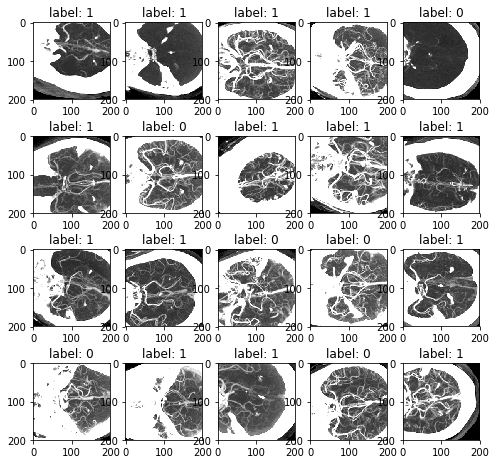

In [22]:
import matplotlib.pyplot as plt

ROWS = 4
COLS = 5
OFFSET = 40
fig = plt.figure(figsize=(8, 8))
for i in range(20):
    ax = fig.add_subplot(ROWS, COLS, i + 1)
    ax.set_title(f'label: {y_train[i]}')
    plt.imshow(X_train[i + OFFSET])

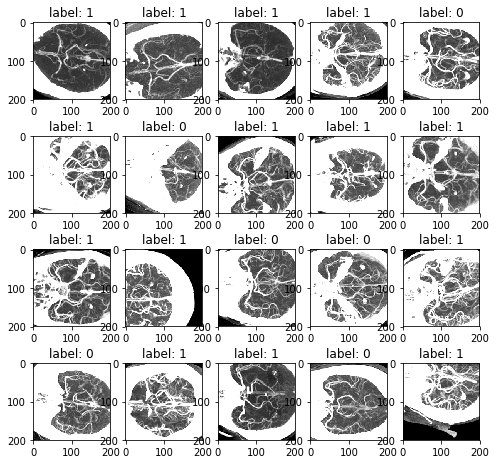

In [23]:
ROWS = 4
COLS = 5
OFFSET = 60
fig = plt.figure(figsize=(8, 8))
for i in range(20):
    ax = fig.add_subplot(ROWS, COLS, i + 1)
    ax.set_title(f'label: {y_train[i]}')
    plt.imshow(X_train[i + OFFSET])

In [24]:
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D 
from keras.models import Model
from keras.optimizers import Adam

# expected input shape: (160, 160, 3)
#base_model = applications.nasnet.NASNetMobile(input_shape=(120, 120, 3), include_top=False, weights='imagenet', input_tensor=None, pooling=None, classes=1000)
base_model = applications.resnet50.ResNet50(input_shape=(200, 200, 3), include_top=False, weights='imagenet', input_tensor=None, pooling=None, classes=1000)

Using TensorFlow backend.


In [25]:
# build a classifier model to put on top of the convolutional model
# This consists of a global average pooling layer and a fully connected layer with 256 nodes # Then apply dropout and sigmoid activation
model_top = Sequential()
model_top.add(GlobalAveragePooling2D(input_shape=base_model.output_shape[1:], data_format=None))
model_top.add(Dense(1024, activation='relu'))
model_top.add(Dropout(0.5))
model_top.add(Dense(1, activation='sigmoid'))
model = Model(inputs=base_model.input, outputs=model_top(base_model.output))
# Compile model using Adam optimizer with common values and binary cross entropy loss # Use low learning rate (lr) for transfer learning
model.compile(optimizer=Adam(lr=0.00001, beta_1=0.9, beta_2=0.999, epsilon=1e-08,decay=0.0), loss='binary_crossentropy', metrics=['accuracy'])

In [26]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 200, 200, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 206, 206, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 100, 100, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 100, 100, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [27]:
# epochs = number of passes of through training data # batch_size = number images processed at same time train_samples = 65

epochs = 20
batch_size = 80

In [28]:
from sklearn.metrics import roc_auc_score
from keras.callbacks import Callback
class roc_callback(Callback):
    def __init__(self,training_data,validation_data):
        self.x = training_data[0]
        self.y = training_data[1]
        self.x_val = validation_data[0]
        self.y_val = validation_data[1]


    def on_train_begin(self, logs={}):
        return

    def on_train_end(self, logs={}):
        return

    def on_epoch_begin(self, epoch, logs={}):
        return

    def on_epoch_end(self, epoch, logs={}):
        y_pred = self.model.predict(self.x)
        roc = roc_auc_score(self.y, y_pred)
        y_pred_val = self.model.predict(self.x_val)
        roc_val = roc_auc_score(self.y_val, y_pred_val)
        print('\rroc-auc: %s - roc-auc_val: %s' % (str(round(roc,4)),str(round(roc_val,4))),end=100*' '+'\n')
        return

    def on_batch_begin(self, batch, logs={}):
        return

    def on_batch_end(self, batch, logs={}):
        return

In [29]:
# Fine-tune the pretrained Inception V3 model using the data generator 
# Specify steps per epoch (number of samples/batch_size)
history = model.fit(augmented_X_train, augmented_y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_data=(X_valid, y_valid))

Train on 1000 samples, validate on 379 samples
Epoch 1/20
1000/1000 [==============================] - 28s 28ms/step - loss: 0.7287 - acc: 0.5140 - val_loss: 0.6613 - val_acc: 0.5937
Epoch 2/20
1000/1000 [==============================] - 7s 7ms/step - loss: 0.6081 - acc: 0.6590 - val_loss: 0.6420 - val_acc: 0.6016
Epoch 3/20
1000/1000 [==============================] - 7s 7ms/step - loss: 0.5420 - acc: 0.7380 - val_loss: 0.6333 - val_acc: 0.6253
Epoch 4/20
1000/1000 [==============================] - 7s 7ms/step - loss: 0.4670 - acc: 0.8020 - val_loss: 0.6257 - val_acc: 0.6227
Epoch 5/20
1000/1000 [==============================] - 7s 7ms/step - loss: 0.4174 - acc: 0.8440 - val_loss: 0.6149 - val_acc: 0.6280
Epoch 6/20
1000/1000 [==============================] - 7s 7ms/step - loss: 0.3495 - acc: 0.9070 - val_loss: 0.6118 - val_acc: 0.6438
Epoch 7/20
1000/1000 [==============================] - 7s 7ms/step - loss: 0.2919 - acc: 0.9330 - val_loss: 0.6219 - val_acc: 0.6253
Epoch 8/20
10

In [35]:
from sklearn.metrics import roc_curve
y_pred_keras = model.predict(X_valid).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_valid, y_pred_keras)

In [31]:
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)
print(auc_keras)

0.709726443768997


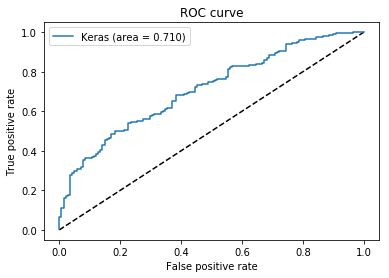

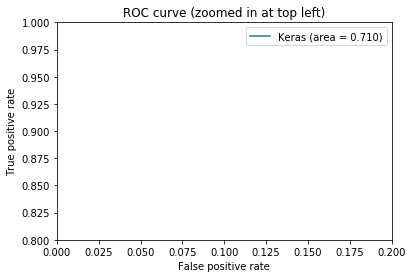

In [32]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()
# Zoom in view of the upper left corner.
plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


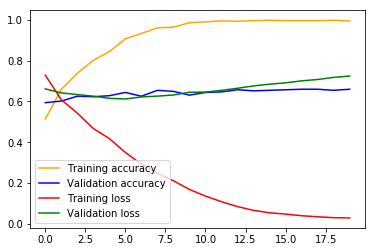

In [33]:
# import matplotlib library, and plot training cuve
import matplotlib.pyplot as plt 
print(history.history.keys())
plt.figure()
plt.plot(history.history['acc'], 'orange', label='Training accuracy') 
plt.plot(history.history['val_acc'], 'blue', label='Validation accuracy') 
plt.plot(history.history['loss'], 'red', label='Training loss') 
plt.plot(history.history['val_loss'], 'green', label='Validation loss') 
plt.legend()
plt.show()

In [34]:
#model.save('model-inception-06-12-18')